# Module 08: Gradient Descent

**The Engine of Learning**

---

## Objectives

By the end of this notebook, you will:
- Understand the intuition behind gradient descent
- Master the mathematical derivation
- Understand learning rate effects
- Know Batch, Stochastic, and Mini-batch variants
- Implement gradient descent from scratch

**Prerequisites:**
- [Module 01 - Math Prerequisites](../01_python_math_prerequisites/01_prerequisites.ipynb)
- [Module 07 - Loss Functions](../07_loss_functions/07_loss_functions.ipynb)

---

In [16]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

plt.style.use('seaborn-v0_8-whitegrid')
np.random.seed(42)

---

# Part 1: The Intuition

---

## 1.1 Finding the Minimum

Imagine you're blindfolded on a hilly terrain and need to find the lowest point.

**Strategy:**
1. Feel which way is downhill (compute gradient)
2. Take a step in that direction
3. Repeat until you can't go lower

This is exactly what gradient descent does!

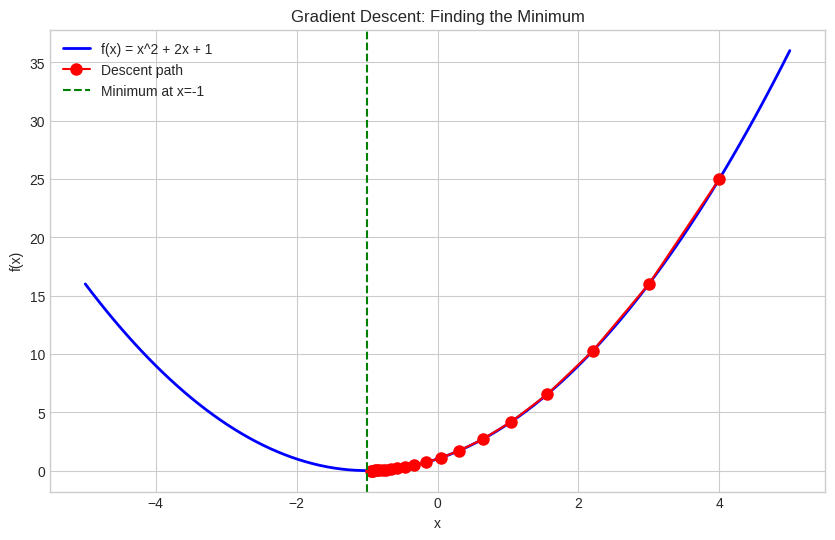

Starting point: x = 4.0
Final point: x = -0.9424 (optimal: -1)


In [17]:
# Visualization: 1D gradient descent
def f(x):
    return x**2 + 2*x + 1

def df(x):
    return 2*x + 2

# Gradient descent
x = 4.0  # Starting point
lr = 0.1  # Learning rate
history = [x]

for _ in range(20):
    grad = df(x)
    x = x - lr * grad  # Update step
    history.append(x)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

x_range = np.linspace(-5, 5, 100)
ax.plot(x_range, f(x_range), 'b-', linewidth=2, label='f(x) = x^2 + 2x + 1')

# Plot descent path
history_arr = np.array(history)
ax.plot(history_arr, f(history_arr), 'ro-', markersize=8, label='Descent path')

# Mark minimum
ax.axvline(x=-1, color='green', linestyle='--', label='Minimum at x=-1')

ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Gradient Descent: Finding the Minimum')
ax.legend()
plt.show()

print(f"Starting point: x = 4.0")
print(f"Final point: x = {history[-1]:.4f} (optimal: -1)")

## 1.2 The Gradient Points Uphill

The gradient $\nabla f$ points in the direction of **steepest ascent**.

To go downhill (minimize), we move in the **opposite direction**: $-\nabla f$

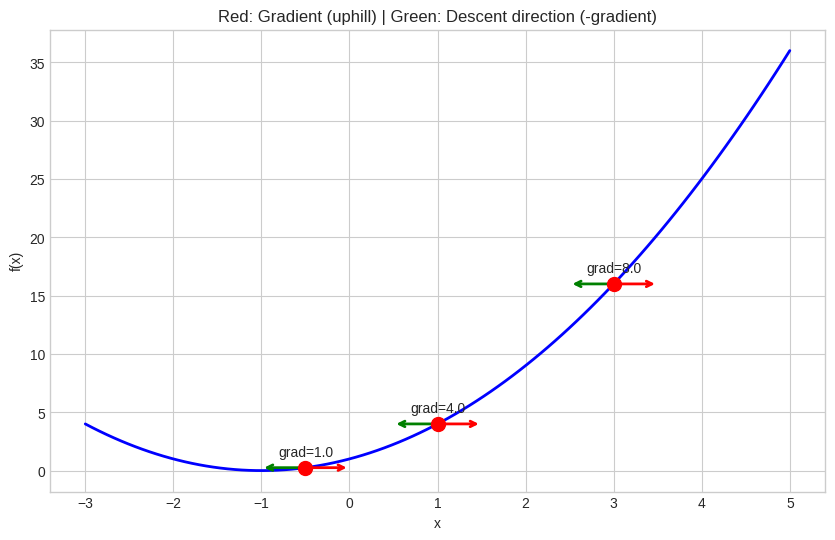

In [18]:
# Visualization: Gradient direction
fig, ax = plt.subplots(figsize=(10, 6))

x_range = np.linspace(-3, 5, 100)
ax.plot(x_range, f(x_range), 'b-', linewidth=2)

# Show gradient at different points
points = [3, 1, -0.5]
for x in points:
    grad = df(x)
    ax.scatter([x], [f(x)], s=100, c='red', zorder=5)

    # Arrow showing gradient direction (uphill)
    ax.annotate('', xy=(x + 0.5*np.sign(grad), f(x)), xytext=(x, f(x)),
                arrowprops=dict(arrowstyle='->', color='red', lw=2))

    # Arrow showing descent direction (downhill)
    ax.annotate('', xy=(x - 0.5*np.sign(grad), f(x)), xytext=(x, f(x)),
                arrowprops=dict(arrowstyle='->', color='green', lw=2))

    ax.text(x, f(x)+1, f'grad={grad:.1f}', ha='center')

ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Red: Gradient (uphill) | Green: Descent direction (-gradient)')
plt.show()

---

# Part 2: Mathematical Formulation

---

## 2.1 The Update Rule

$$\theta_{t+1} = \theta_t - \alpha \nabla L(\theta_t)$$

Where:
- $\theta$ = parameters (weights and biases)
- $\alpha$ = learning rate (step size)
- $\nabla L$ = gradient of loss with respect to parameters
- $t$ = iteration number

## 2.2 For Neural Networks

For weight $w$ and bias $b$:

$$w \leftarrow w - \alpha \frac{\partial L}{\partial w}$$

$$b \leftarrow b - \alpha \frac{\partial L}{\partial b}$$

In [19]:
# Example: Linear regression with gradient descent
# y = wx + b
# Loss = MSE = (1/n) * sum((y_true - y_pred)^2)

# Generate data
np.random.seed(42)
X = np.random.randn(100)
y_true = 3 * X + 2 + np.random.randn(100) * 0.5  # y = 3x + 2 + noise

# Initialize parameters
w = 0.0
b = 0.0
lr = 0.1

# Track history
w_history = [w]
b_history = [b]
loss_history = []

# Gradient descent
n_epochs = 50

for epoch in range(n_epochs):
    # Forward pass
    y_pred = w * X + b

    # Compute loss
    loss = np.mean((y_true - y_pred) ** 2)
    loss_history.append(loss)

    # Compute gradients
    # dL/dw = -2/n * sum(x * (y_true - y_pred))
    # dL/db = -2/n * sum(y_true - y_pred)
    dw = -2/len(X) * np.sum(X * (y_true - y_pred))
    db = -2/len(X) * np.sum(y_true - y_pred)

    # Update parameters
    w = w - lr * dw
    b = b - lr * db

    w_history.append(w)
    b_history.append(b)

print(f"True: w=3, b=2")
print(f"Learned: w={w:.3f}, b={b:.3f}")

True: w=3, b=2
Learned: w=2.928, b=2.003


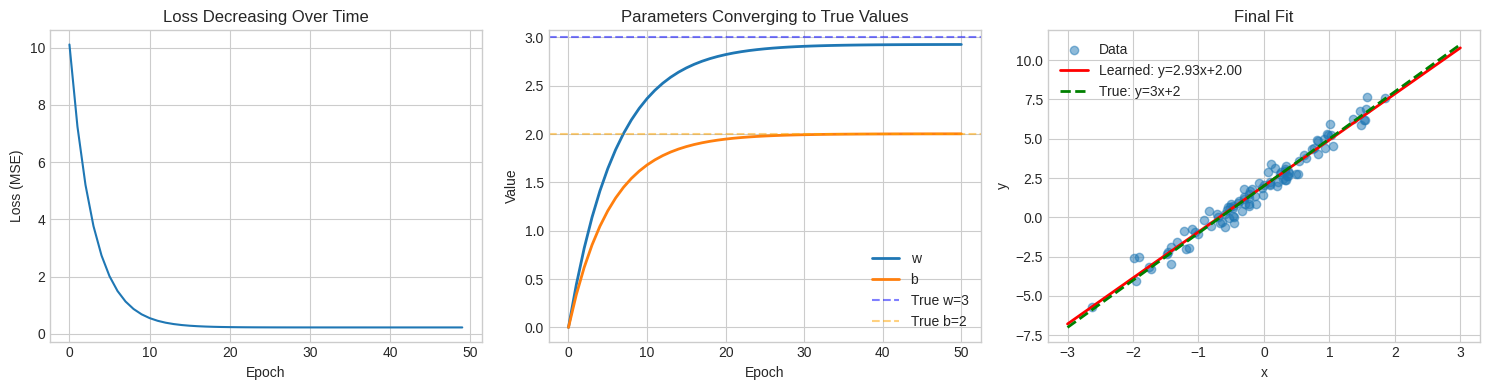

In [20]:
# Visualize learning
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Loss curve
axes[0].plot(loss_history)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].set_title('Loss Decreasing Over Time')

# Parameter evolution
axes[1].plot(w_history, label='w', linewidth=2)
axes[1].plot(b_history, label='b', linewidth=2)
axes[1].axhline(y=3, color='blue', linestyle='--', alpha=0.5, label='True w=3')
axes[1].axhline(y=2, color='orange', linestyle='--', alpha=0.5, label='True b=2')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Value')
axes[1].set_title('Parameters Converging to True Values')
axes[1].legend()

# Final fit
axes[2].scatter(X, y_true, alpha=0.5, label='Data')
x_line = np.linspace(-3, 3, 100)
axes[2].plot(x_line, w * x_line + b, 'r-', linewidth=2, label=f'Learned: y={w:.2f}x+{b:.2f}')
axes[2].plot(x_line, 3 * x_line + 2, 'g--', linewidth=2, label='True: y=3x+2')
axes[2].set_xlabel('x')
axes[2].set_ylabel('y')
axes[2].set_title('Final Fit')
axes[2].legend()

plt.tight_layout()
plt.show()

---

# Part 3: Learning Rate

---

## 3.1 The Effect of Learning Rate

The learning rate $\alpha$ controls step size:
- **Too small**: Slow convergence, may get stuck
- **Too large**: Overshoot minimum, may diverge
- **Just right**: Fast and stable convergence

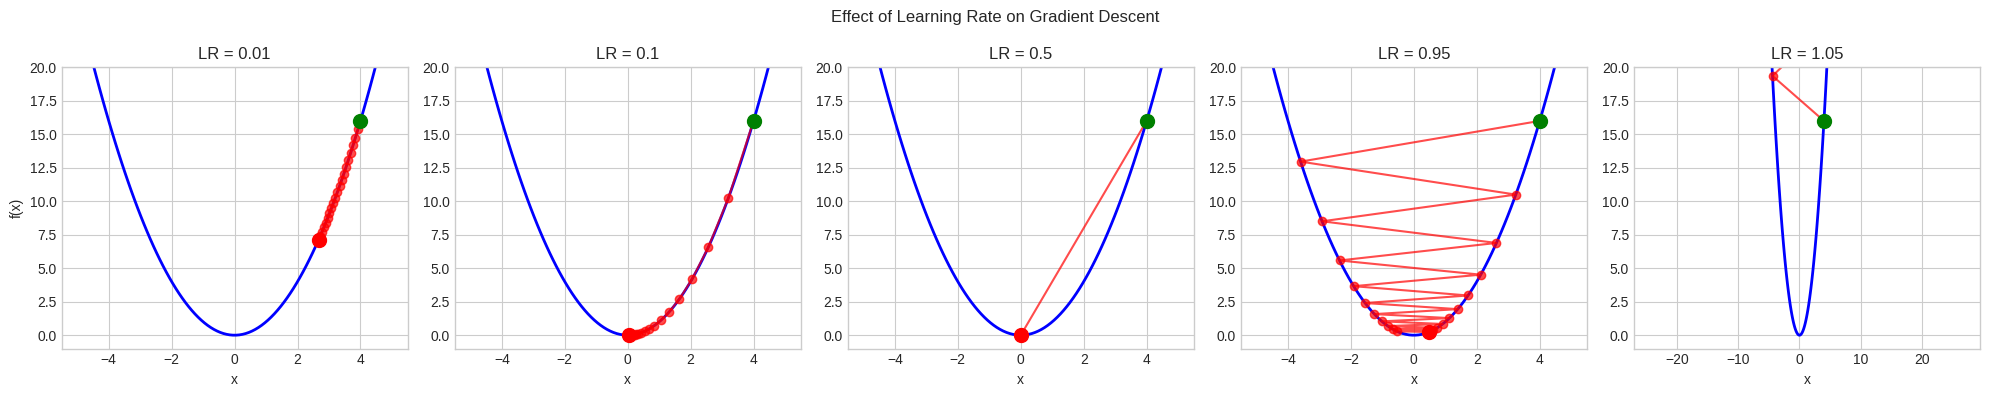

In [21]:
def gradient_descent_1d(f, df, x0, lr, n_steps):
    """1D gradient descent."""
    x = x0
    history = [x]
    for _ in range(n_steps):
        x = x - lr * df(x)
        history.append(x)
    return np.array(history)

# Test different learning rates
f = lambda x: x**2
df = lambda x: 2*x

learning_rates = [0.01, 0.1, 0.5, 0.95, 1.05]

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
x_range = np.linspace(-5, 5, 100)

for ax, lr in zip(axes, learning_rates):
    history = gradient_descent_1d(f, df, 4.0, lr, 20)

    ax.plot(x_range, f(x_range), 'b-', linewidth=2)
    ax.plot(history, f(history), 'ro-', markersize=6, alpha=0.7)
    ax.scatter([history[0]], [f(history[0])], c='green', s=100, zorder=5, label='Start')
    ax.scatter([history[-1]], [f(history[-1])], c='red', s=100, zorder=5, label='End')

    ax.set_title(f'LR = {lr}')
    ax.set_ylim(-1, 20)
    ax.set_xlabel('x')

axes[0].set_ylabel('f(x)')
plt.suptitle('Effect of Learning Rate on Gradient Descent', fontsize=12)
plt.tight_layout()
plt.show()

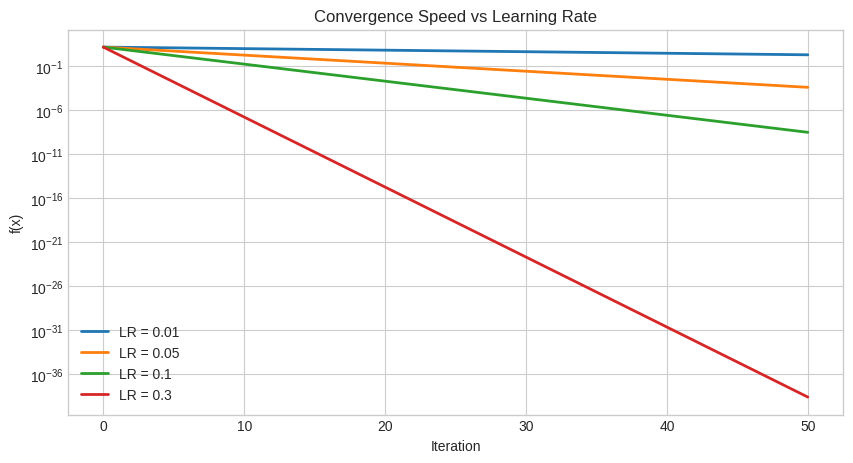

In [22]:
# Loss curves for different learning rates
fig, ax = plt.subplots(figsize=(10, 5))

for lr in [0.01, 0.05, 0.1, 0.3]:
    history = gradient_descent_1d(f, df, 4.0, lr, 50)
    ax.plot(f(history), label=f'LR = {lr}', linewidth=2)

ax.set_xlabel('Iteration')
ax.set_ylabel('f(x)')
ax.set_title('Convergence Speed vs Learning Rate')
ax.legend()
ax.set_yscale('log')
plt.show()

## 3.2 Finding a Good Learning Rate

General guidelines:
- Start with 0.01 or 0.001
- Watch the loss curve
- If loss decreases steadily: LR might be OK or too small
- If loss oscillates or explodes: LR too large
- Use learning rate schedulers for better results

---

# Part 4: Variants of Gradient Descent

---

## 4.1 Batch Gradient Descent

Uses **all training examples** to compute each gradient update.

$$\theta = \theta - \alpha \nabla L(\theta; X, y)$$

**Pros:** Stable, true gradient direction
**Cons:** Slow for large datasets, requires full dataset in memory

In [23]:
def batch_gradient_descent(X, y, lr=0.1, n_epochs=100):
    """Batch (full) gradient descent."""
    w, b = 0.0, 0.0
    losses = []

    for epoch in range(n_epochs):
        # Use ALL data
        y_pred = w * X + b
        loss = np.mean((y - y_pred) ** 2)
        losses.append(loss)

        dw = -2/len(X) * np.sum(X * (y - y_pred))
        db = -2/len(X) * np.sum(y - y_pred)

        w -= lr * dw
        b -= lr * db

    return w, b, losses

## 4.2 Stochastic Gradient Descent (SGD)

Uses **one random example** for each update.

$$\theta = \theta - \alpha \nabla L(\theta; x_i, y_i)$$

**Pros:** Fast updates, can escape local minima, works with streaming data
**Cons:** Noisy gradients, may never fully converge

In [24]:
def stochastic_gradient_descent(X, y, lr=0.01, n_epochs=10):
    """Stochastic (single-sample) gradient descent."""
    w, b = 0.0, 0.0
    losses = []

    for epoch in range(n_epochs):
        # Shuffle data each epoch
        indices = np.random.permutation(len(X))

        for i in indices:
            # Use ONE sample
            xi, yi = X[i], y[i]
            y_pred = w * xi + b

            dw = -2 * xi * (yi - y_pred)
            db = -2 * (yi - y_pred)

            w -= lr * dw
            b -= lr * db

        # Track loss after each epoch
        y_pred_all = w * X + b
        losses.append(np.mean((y - y_pred_all) ** 2))

    return w, b, losses

## 4.3 Mini-Batch Gradient Descent

Uses **small batches** of examples. Best of both worlds!

$$\theta = \theta - \alpha \nabla L(\theta; X_{batch}, y_{batch})$$

**Pros:** Faster than batch, less noisy than SGD, GPU-friendly
**Cons:** Need to choose batch size

In [25]:
def minibatch_gradient_descent(X, y, batch_size=32, lr=0.1, n_epochs=100):
    """Mini-batch gradient descent."""
    w, b = 0.0, 0.0
    losses = []
    n = len(X)

    for epoch in range(n_epochs):
        # Shuffle data
        indices = np.random.permutation(n)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # Process in batches
        for i in range(0, n, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            y_pred = w * X_batch + b

            dw = -2/len(X_batch) * np.sum(X_batch * (y_batch - y_pred))
            db = -2/len(X_batch) * np.sum(y_batch - y_pred)

            w -= lr * dw
            b -= lr * db

        # Track loss
        y_pred_all = w * X + b
        losses.append(np.mean((y - y_pred_all) ** 2))

    return w, b, losses

In [26]:
# Compare the three variants
np.random.seed(42)
X = np.random.randn(1000)
y = 3 * X + 2 + np.random.randn(1000) * 0.5

w_batch, b_batch, loss_batch = batch_gradient_descent(X, y, lr=0.1, n_epochs=50)
w_sgd, b_sgd, loss_sgd = stochastic_gradient_descent(X, y, lr=0.01, n_epochs=50)
w_mini, b_mini, loss_mini = minibatch_gradient_descent(X, y, batch_size=32, lr=0.1, n_epochs=50)

print(f"Batch GD:     w={w_batch:.3f}, b={b_batch:.3f}")
print(f"SGD:          w={w_sgd:.3f}, b={b_sgd:.3f}")
print(f"Mini-batch:   w={w_mini:.3f}, b={b_mini:.3f}")
print(f"True:         w=3.000, b=2.000")

Batch GD:     w=2.979, b=2.036
SGD:          w=3.038, b=2.005
Mini-batch:   w=3.044, b=2.004
True:         w=3.000, b=2.000


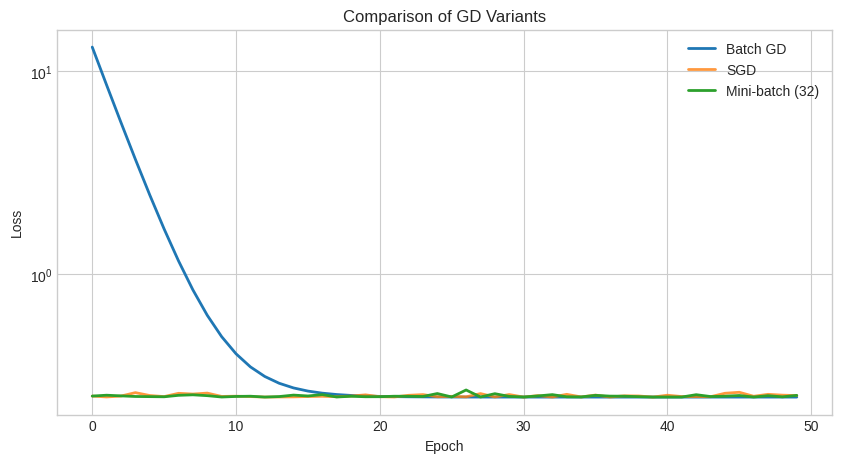

In [27]:
# Compare loss curves
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(loss_batch, label='Batch GD', linewidth=2)
ax.plot(loss_sgd, label='SGD', linewidth=2, alpha=0.8)
ax.plot(loss_mini, label='Mini-batch (32)', linewidth=2)

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Comparison of GD Variants')
ax.legend()
ax.set_yscale('log')
plt.show()

## 4.4 Comparison Summary

| Variant | Samples per Update | Speed | Noise | GPU Usage |
|---------|-------------------|-------|-------|-------|
| Batch | All (N) | Slow | None | Poor (large batches) |
| SGD | 1 | Fast per sample | High | Poor (no parallelism) |
| Mini-batch | B (16-512) | Best | Moderate | Best |

---

# Part 5: Visualizing Loss Landscapes

---

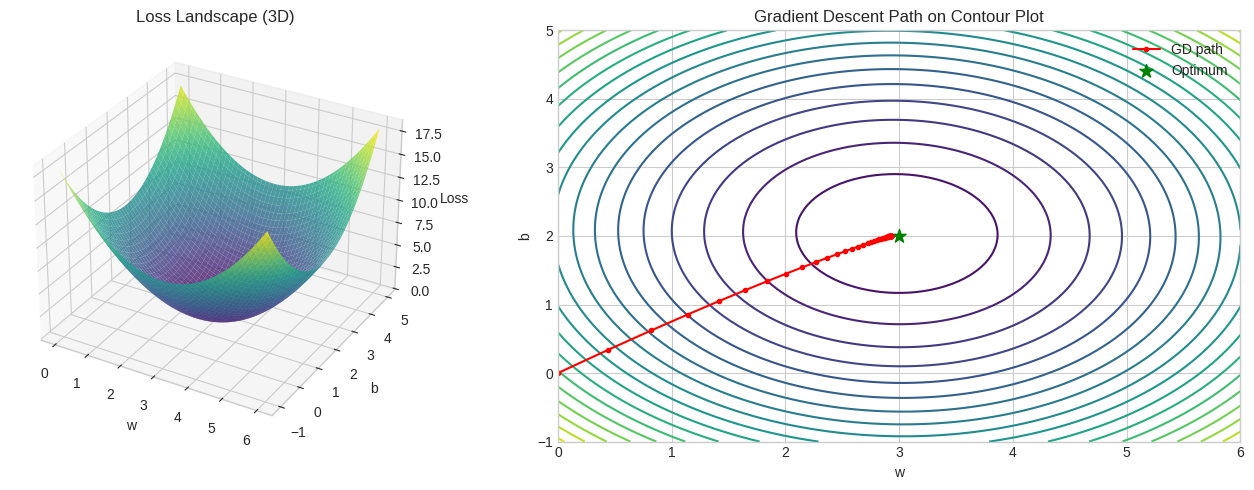

In [28]:
# 2D loss landscape visualization
def loss_landscape(w, b, X, y):
    y_pred = w * X + b
    return np.mean((y - y_pred) ** 2)

# Create meshgrid
w_range = np.linspace(0, 6, 100)
b_range = np.linspace(-1, 5, 100)
W, B = np.meshgrid(w_range, b_range)
L = np.zeros_like(W)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        L[i, j] = loss_landscape(W[i, j], B[i, j], X, y)

# Plot
fig = plt.figure(figsize=(14, 5))

# 3D surface
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(W, B, L, cmap=cm.viridis, alpha=0.8)
ax1.set_xlabel('w')
ax1.set_ylabel('b')
ax1.set_zlabel('Loss')
ax1.set_title('Loss Landscape (3D)')

# Contour plot with path
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contour(W, B, L, levels=20, cmap='viridis')
ax2.plot(w_history, b_history, 'r.-', label='GD path')
ax2.scatter([3], [2], c='green', s=100, marker='*', label='Optimum')
ax2.set_xlabel('w')
ax2.set_ylabel('b')
ax2.set_title('Gradient Descent Path on Contour Plot')
ax2.legend()

plt.tight_layout()
plt.show()

---

# Part 6: Challenges and Solutions

---

## 6.1 Local Minima and Saddle Points

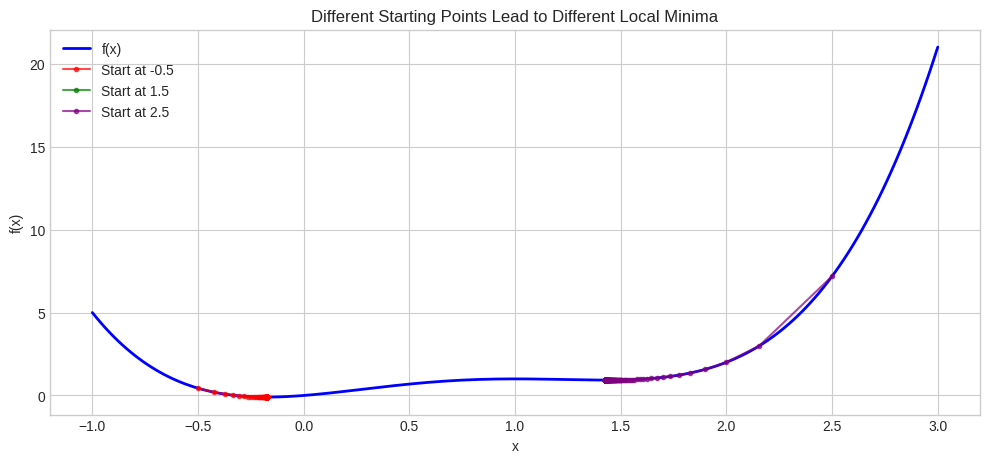

In [29]:
# Function with multiple minima
def multi_minima(x):
    return x**4 - 3*x**3 + 2*x**2 + x

def multi_minima_grad(x):
    return 4*x**3 - 9*x**2 + 4*x + 1

# Starting from different points leads to different minima
fig, ax = plt.subplots(figsize=(12, 5))

x_range = np.linspace(-1, 3, 200)
ax.plot(x_range, multi_minima(x_range), 'b-', linewidth=2, label='f(x)')

starting_points = [-0.5, 1.5, 2.5]
colors = ['red', 'green', 'purple']

for x0, color in zip(starting_points, colors):
    history = gradient_descent_1d(multi_minima, multi_minima_grad, x0, 0.02, 100)
    # Fixed: Use explicit color and marker arguments instead of shorthand format strings
    ax.plot(history, multi_minima(history), color=color, marker='.', linestyle='-', alpha=0.7,
            label=f'Start at {x0}')

ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Different Starting Points Lead to Different Local Minima')
ax.legend()
plt.show()

## 6.2 Solutions

1. **Momentum**: Helps escape local minima (covered in Module 10)
2. **Random restarts**: Try multiple starting points
3. **SGD noise**: Noisy gradients can escape shallow minima
4. **Better optimizers**: Adam, RMSprop (Module 10)

---

# Key Points Summary

---

## The Algorithm
- Move in the opposite direction of the gradient
- Update: $\theta = \theta - \alpha \nabla L$
- Repeat until convergence

## Learning Rate
- Too small: slow convergence
- Too large: overshooting, divergence
- Typical starting values: 0.01, 0.001

## Variants
- **Batch GD**: All data per update, stable but slow
- **SGD**: One sample, fast but noisy
- **Mini-batch**: Best of both, most commonly used

## Common Batch Sizes
- 32, 64, 128, 256 (powers of 2 for GPU efficiency)

---

# Interview Tips

---

## Common Questions

**Q: What is gradient descent?**
A: An optimization algorithm that minimizes a function by iteratively moving in the direction opposite to the gradient. For neural networks, it updates weights to minimize the loss function.

**Q: What is the difference between SGD and batch gradient descent?**
A: Batch GD uses all training data for each update (stable but slow). SGD uses one sample (fast but noisy). Mini-batch uses small batches (practical compromise used in practice).

**Q: How do you choose the learning rate?**
A: Start with common values (0.01, 0.001), monitor loss curves. Too high causes oscillation/divergence, too low causes slow convergence. Use learning rate schedulers for better results.

**Q: Can gradient descent get stuck in local minima?**
A: Yes, but in high-dimensional spaces of neural networks, local minima are rare. Saddle points are more common but can be escaped with momentum and noise from SGD.

---

# Practice Exercises

---

## Exercise 1: Implement GD for Polynomial Regression

Fit $y = ax^2 + bx + c$ using gradient descent.

In [30]:
# Generate data
X = np.linspace(-2, 2, 50)
y = 2*X**2 - 3*X + 1 + np.random.randn(50) * 0.5

# Your code here: implement gradient descent for a, b, c

## Exercise 2: Learning Rate Finder

Implement a simple learning rate finder that tries different learning rates and plots the loss.

In [31]:
# Your code here

## Solutions

In [32]:
# Exercise 1 Solution
print("Exercise 1: Polynomial Regression")

X = np.linspace(-2, 2, 50)
y = 2*X**2 - 3*X + 1 + np.random.randn(50) * 0.5

a, b, c = 0.0, 0.0, 0.0
lr = 0.01

for _ in range(1000):
    y_pred = a*X**2 + b*X + c
    error = y - y_pred

    da = -2/len(X) * np.sum(X**2 * error)
    db = -2/len(X) * np.sum(X * error)
    dc = -2/len(X) * np.sum(error)

    a -= lr * da
    b -= lr * db
    c -= lr * dc

print(f"Learned: a={a:.3f}, b={b:.3f}, c={c:.3f}")
print(f"True:    a=2.000, b=-3.000, c=1.000")

Exercise 1: Polynomial Regression
Learned: a=1.994, b=-3.026, c=0.975
True:    a=2.000, b=-3.000, c=1.000


---

## Next Module: [09 - Backpropagation](../09_backpropagation/09_backpropagation.ipynb)

Now that we understand gradient descent, let's learn how gradients are computed efficiently using backpropagation.